In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [4]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([10,110,5,20])
data=np.concatenate([data,outliers])

In [5]:
df=pd.DataFrame(data,columns=['Values'])
df.head()

,Values
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466


In [6]:
df.tail()

,Values
99,47.654129
100,10.000000
101,110.000000
102,5.000000
103,20.000000


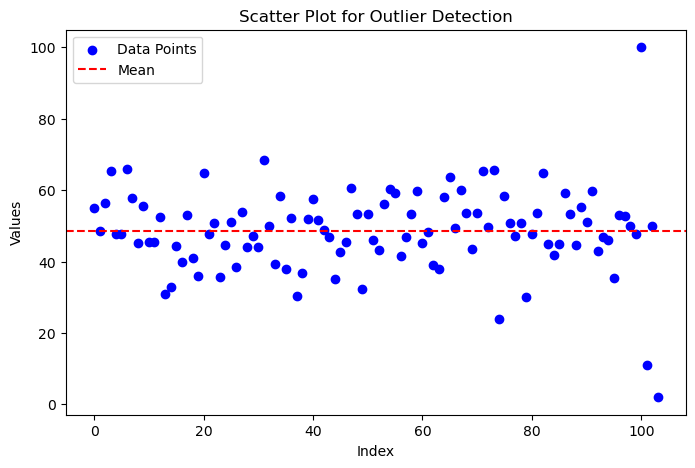

In [19]:
#scatter-plot
plt.figure(figsize=(8,5))
plt.scatter(range(len(df)),df['Values'],color='blue',label='Data Points')
plt.axhline(y=df['Values'].mean(),color='red',linestyle='--',label='Mean')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Scatter Plot for Outlier Detection")
plt.legend()
plt.show()

In [12]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([100,11,50,2])
data=np.concatenate([data,outliers])

In [13]:
df=pd.DataFrame(data,columns=['Values'])
df.head()

,Values
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466


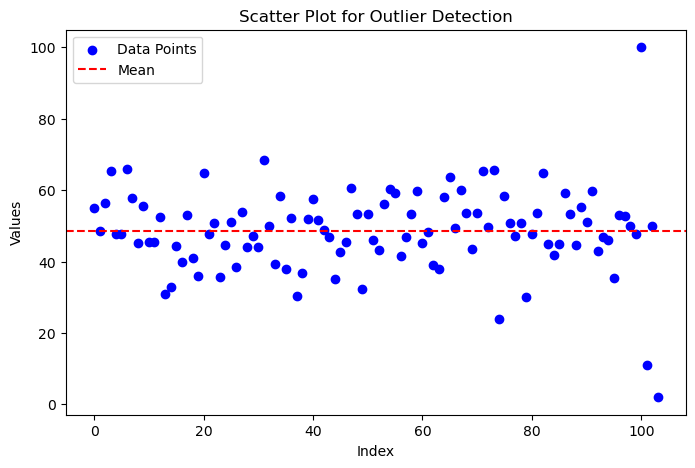

In [14]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(df)),df['Values'],color='blue',label='Data Points')
plt.axhline(y=df['Values'].mean(),color='red',linestyle='--',label='Mean')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Scatter Plot for Outlier Detection")
plt.legend()
plt.show()

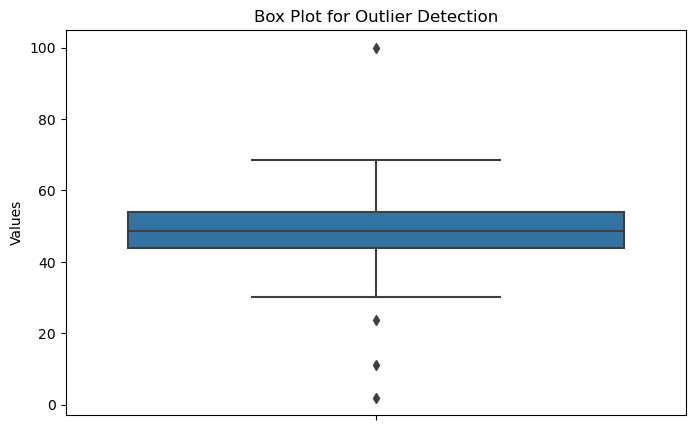

In [18]:
#box-plot
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y='Values')
plt.title("Box Plot for Outlier Detection")
plt.show()

In [22]:
#z-score method
df['Z-Score']=zscore(df['Values'])
df['Outlier_Z']=df['Z-Score'].apply(lambda x:'Outlier' if abs(x) >3 else 'Normal')
print(df[df['Outlier_Z']=='Outlier'])

     Values   Z-Score Outlier_Z
100   100.0  4.363168   Outlier
101    11.0 -3.198458   Outlier
103     2.0 -3.963116   Outlier


In [23]:
Q1=df['Values'].quantile(0.25)
Q3=df['Values'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+11.5*IQR
#Identifying outliers
df['Outlier_IQR']=df['Values'].apply(lambda x:'Outlier' if (x<lower_bound or x>upper_bound)else 'Normal')
print(df[df['Outlier_IQR']=='Outlier'])

        Values   Z-Score Outlier_Z Outlier_IQR
74   23.802549 -2.110726    Normal     Outlier
101  11.000000 -3.198458   Outlier     Outlier
103   2.000000 -3.963116   Outlier     Outlier


1.Scatter Plot -> Outliers appear far from the container

2.Box Plot -> Outliers are outside the whiskers

3.Z-Score -> Values with Z>3 or Z<-3 are outliers

4.IQR-Method -> Values outside [Q1-1.5*IQR,Q3+1.5*IQR]  are outliers.


Finding Outliers Using the IQR Method with a 5-Number Summary**
The 5-number summary consists of:
 
Minimum (Q0) → The smallest value in the dataset.
 
First Quartile (Q1) → The 25th percentile (lower quartile).
 
Median (Q2) → The 50th percentile (middle value).
 
Third Quartile (Q3) → The 75th percentile (upper quartile).
 
Maximum (Q4) → The largest value in the dataset.

The Interquartile Range (IQR) is calculated as:
 
IQR=Q3−Q1
 
Any value outside the range:
 
[Q1−1.5×IQR,Q3+1.5×IQR]  is considered an outlier.

In [26]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([10,110,5,20])
data=np.concatenate([data,outliers])
Q1=np.percentile(data,25)
Q2=np.median(data)
Q3=np.percentile(data,75)
min_value=np.min(data)
max_value=np.max(data)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=data[(data<lower_bound)|(data>upper_bound)]
print(f"5-Number Summary:\n Min:{min_value},Q1:{Q1},Median (Q2):{Q2},Q3:{Q3},Max:{max_value}")
print(f"IQR:{IQR}")
print(f"Lower Bound:{lower_bound},Upper Bound:{upper_bound}")
print(f"Outliers:{outliers}")

5-Number Summary:
 Min:5.0,Q1:43.469296839696675,Median (Q2):48.38038361082499,Q3:54.05952052012062,Max:110.0
IQR:10.590223680423946
Lower Bound:27.583961319060755,Upper Bound:69.94485604075655
Outliers:[ 23.80254896  10.         110.           5.          20.        ]
